In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

three body structure
<img src="./figure/question.png" alt="Drawing" style="width: 200px;"/>
https://www.khanacademy.org/science/ap-biology/chemistry-of-life/structure-of-water-and-hydrogen-bonding/a/hs-water-and-life-review

In [3]:
# System #

'''
H1:1
H2:2
O:3
'''

# Stiffness #
KOH1 = 100
KOH2 = 100

#LOH1 = 0.5
#LOH2 = 0.5

stiffness_list = np.array([KOH1,KOH2])
#spring_length_list = np.array([LOH1,L0H2])


# Mass #
MH1 = 8
MH2 = 8
MO = 16

mass_list = np.array([MH1,MH2,MO])

# Position #
PH1 = [0,0]
PH2 = [2,0]
PO = [0.5,1.5]

position_list = np.array([PH1,PH2,PO])

# Bond list #

bond_list = np.array([[0,2],[1,2]])


In [4]:
def bond_stiffness(k,m1,m2):
    return np.array([[k/(m1**0.5*m1**0.5),0,-k/(m1**0.5*m2**0.5),0],[0,k/(m1**0.5*m1**0.5),0,-k/(m1**0.5*m2**0.5)],[-k/(m1**0.5*m2**0.5),0,k/(m2**0.5*m2**0.5),0],[0,-k/(m1**0.5*m2**0.5),0,k/(m2**0.5*m2**0.5)]])

In [5]:
def hessian(m_list,p_list,b_list,k_list):
    hm = np.zeros((m_list.shape[0]*2,m_list.shape[0]*2))
    
    num_cout = 0
    for i,j in bond_list*2:

        k_n = bond_stiffness(k_list[num_cout],m_list[int(i/3)],m_list[int(j/3)])
        hm[i,i:i+2] += k_n[0,0:2]
        hm[i,j:j+2] += k_n[0,3:4]
        
        hm[i+1,i:i+2] += k_n[1,0:2]
        hm[i+1,j:j+2] += k_n[1,3:4]
        
        hm[i+2,i:i+2] += k_n[2,0:2]
        hm[i+2,j:j+2] += k_n[2,3:4]
        
        hm[j,i:i+2] += k_n[3,0:2]
        hm[j,j:j+2] += k_n[3,3:4]
        
    
    return hm

In [6]:
system_kmatrix = hessian(mass_list,position_list,bond_list,stiffness_list)

In [7]:
system_val, system_vec = np.linalg.eig(-system_kmatrix)

In [8]:
modeshape = system_vec[[2,3,4]]

In [13]:
# Time Array
t = np.arange(0, 2*np.pi, 0.01)
test1 = modeshape[0]
omega = 5

x = np.linspace(0,2*np.pi,100)

# Position Arrays
xvec = [position_list[0][0]+test1[0]*np.sin(2*np.pi*omega*x)]
yvec = [position_list[0][1]+test1[1]*np.sin(2*np.pi*omega*x)]

# Setting up Data Set for Animation
dataSet = np.array([xvec,yvec])  # Combining our position coordinates
numDataPoints = len(t)

In [14]:
def animate_func(num):
    ax.clear()  # Clears the figure to update the line, point,   
                # title, and axes
    # Updating Trajectory Line (num+1 due to Python indexing)
    ax.plot(dataSet[0, :num+1], dataSet[1, :num+1], c='blue')
    # Updating Point Location 
    #ax.plot()
    ax.scatter(dataSet[0, num], dataSet[1, num], 
               c='blue', marker='o')
    # Adding Constant Origin
    ax.plot(dataSet[0, 0], dataSet[1, 0],     
               c='black', marker='o')
    # Setting Axes Limits
    ax.set_xlim3d([-1, 1])
    ax.set_ylim3d([-1, 1])
    #ax.set_zlim3d([0, 100])

    # Adding Figure Labels
    ax.set_title('Trajectory \nTime = ' + str(np.round(t[num],    
                 decimals=2)) + ' sec')
    ax.set_xlabel('x')
    ax.set_ylabel('y')


<Figure size 1800x1200 with 0 Axes>

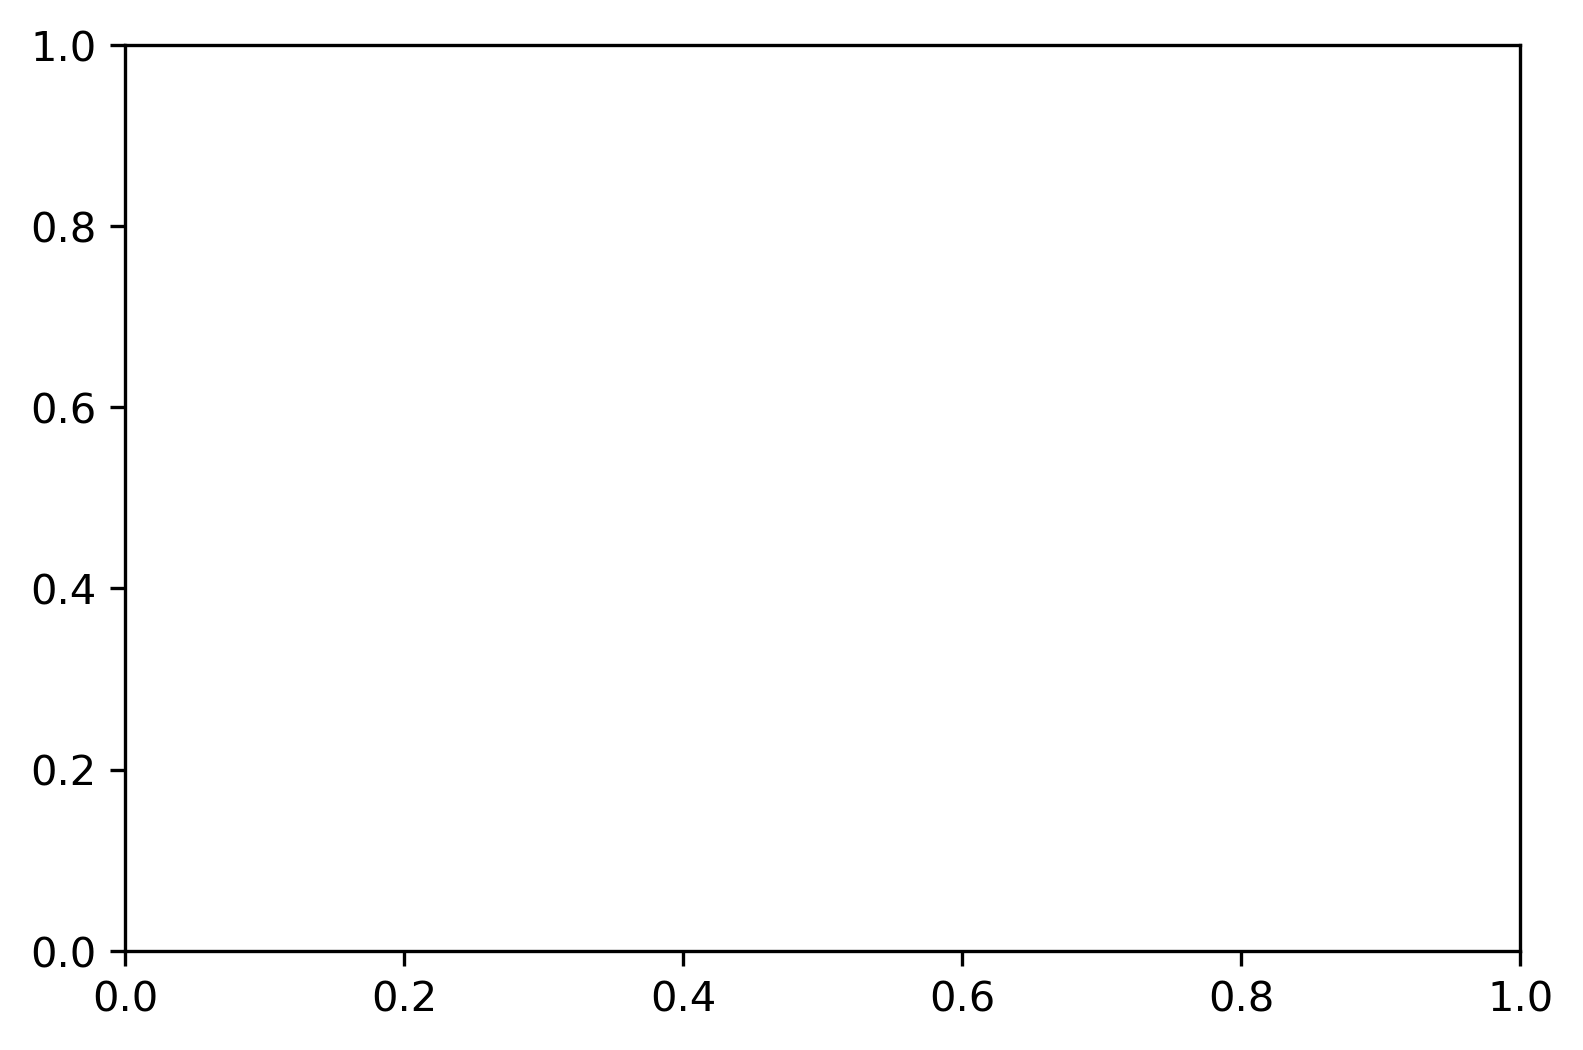

In [15]:
# Plotting the Animation
fig = plt.figure()
fig, ax = plt.subplots()
line_ani = animation.FuncAnimation(fig, animate_func, interval=100,   
                                   frames=numDataPoints)
plt.show()

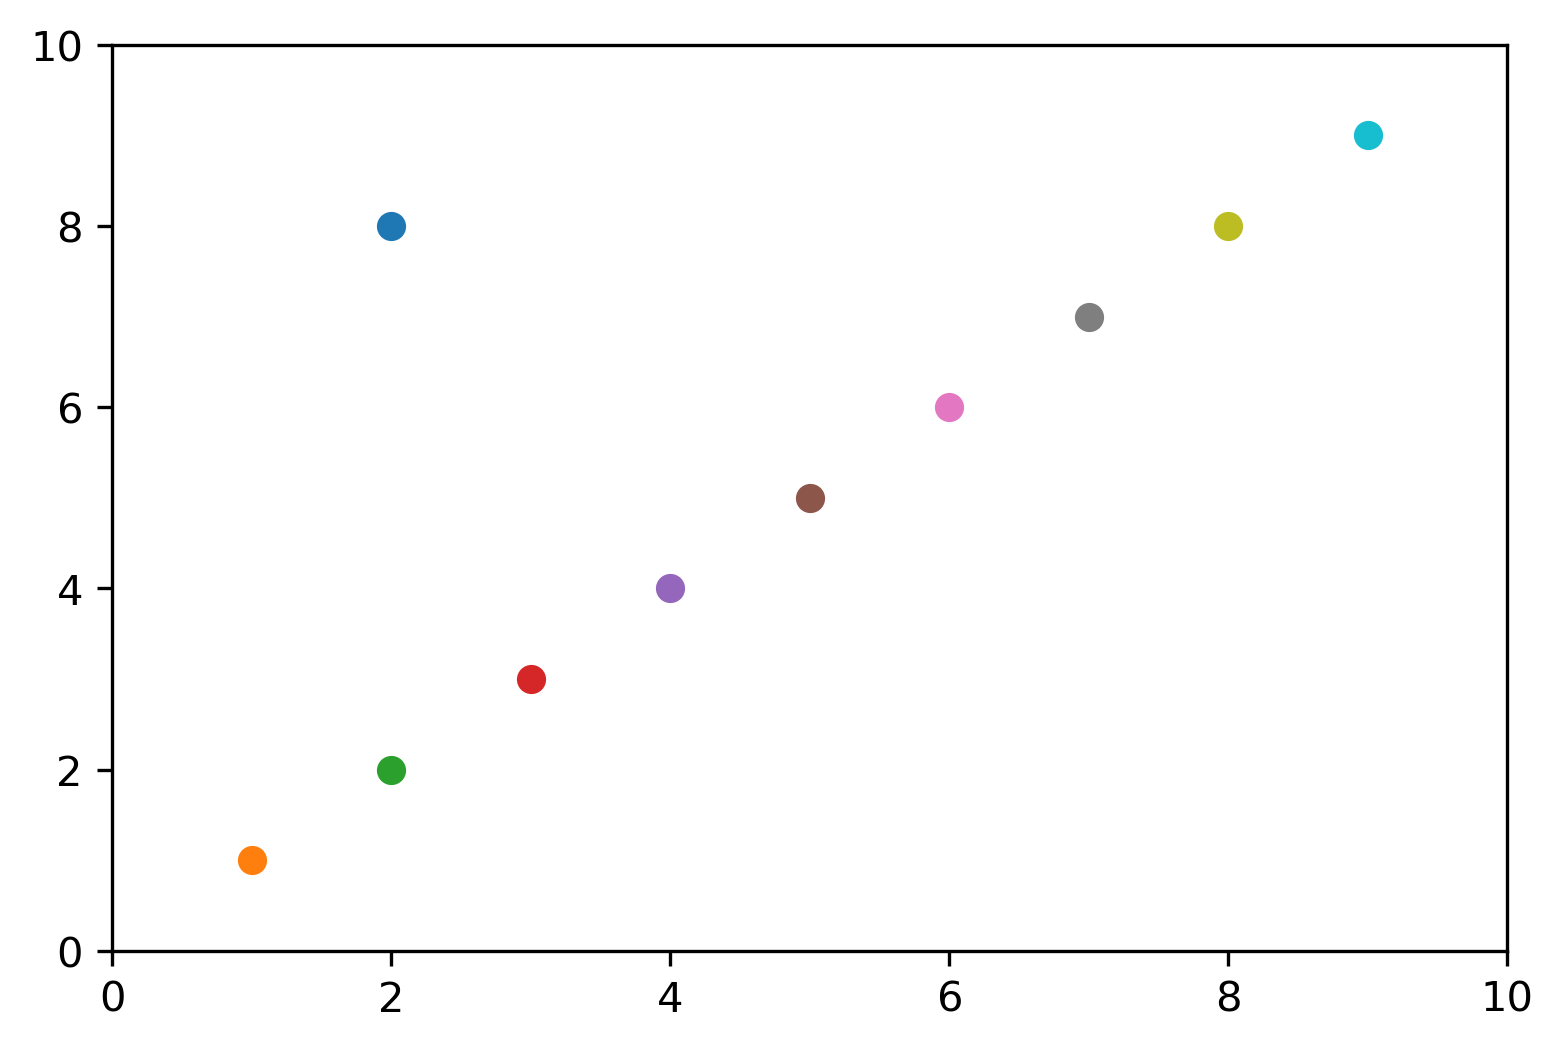

In [21]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()  # 建立單一圖表
ax.set_xlim(0,10)         # 設定 x 軸範圍 0～10
ax.set_ylim(0,10)         # 設定 y 軸範圍 0～10

def init():
    ax.scatter(2, 8)      # 一開始要執行的韓式，在 (2,8) 的位置畫點

def run(data):
    if data>0:
        ax.scatter(data, data)    # 如果資料大於 0，就在圖表上畫點
    else:
        pass

ani = animation.FuncAnimation(fig, run, frames=10, interval=10, init_func=init)  # 製作動畫
ani.save('animation.gif', fps=10)   # 儲存為 gif
plt.show()